In [3]:
import pandas as pd
import time
import datetime
import numpy as np

In [4]:
PATH_TO_DATA = 'Data'
TEST_FILE = 'test_ds.csv'
TRAIN_FILE = 'train_ds.csv'

In [5]:
def read_data(folder, file):
    df = pd.read_csv(folder + '/' + file)
    return df

In [6]:
train_df = read_data(PATH_TO_DATA, TRAIN_FILE)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 9 columns):
cgsettlementbufferid    92700 non-null int64
mcc                     92700 non-null int64
tranccy                 92700 non-null int64
ccy                     92700 non-null int64
amount                  92700 non-null int64
location                92700 non-null object
trandatetime            92700 non-null int64
sexid                   92700 non-null int64
clientid                92700 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


In [8]:
train_df_index = train_df.index.tolist()

In [9]:
y_train = train_df['sexid']

In [10]:
len(y_train)

92700

In [11]:
y_train.to_csv('y_labels.csv', index=None)

In [12]:
test_df = read_data(PATH_TO_DATA, TEST_FILE)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Data columns (total 8 columns):
cgsettlementbufferid    40559 non-null int64
mcc                     40559 non-null int64
tranccy                 40559 non-null int64
ccy                     40559 non-null int64
amount                  40559 non-null int64
location                40559 non-null object
trandatetime            40559 non-null int64
clientid                40559 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.5+ MB


In [14]:
test_df_index = test_df.index.tolist()

In [15]:
cat_train_df = train_df.drop(['cgsettlementbufferid', 'sexid'], axis=1)

In [16]:
cat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 7 columns):
mcc             92700 non-null int64
tranccy         92700 non-null int64
ccy             92700 non-null int64
amount          92700 non-null int64
location        92700 non-null object
trandatetime    92700 non-null int64
clientid        92700 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.0+ MB


In [17]:
cat_test_df = test_df.drop(['cgsettlementbufferid'], axis=1)

In [18]:
cat_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Data columns (total 7 columns):
mcc             40559 non-null int64
tranccy         40559 non-null int64
ccy             40559 non-null int64
amount          40559 non-null int64
location        40559 non-null object
trandatetime    40559 non-null int64
clientid        40559 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.2+ MB


In [19]:
cat_df = cat_train_df.append(cat_test_df)

In [20]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 7 columns):
mcc             133259 non-null int64
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null int64
location        133259 non-null object
trandatetime    133259 non-null int64
clientid        133259 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.1+ MB


In [21]:
curr_data = dict()
for curr in list(cat_df['tranccy'].unique()):
    max_curr = cat_df[cat_df['tranccy'] == curr]['amount'].max()
    min_curr = cat_df[cat_df['tranccy'] == curr]['amount'].min()
    curr_data[curr] = [max_curr, min_curr]

def min_max_amount(raw):
    if curr_data[raw['tranccy']][0] != curr_data[raw['tranccy']][1]:
        temp = (raw['amount'] - curr_data[raw['tranccy']][1]) / (curr_data[raw['tranccy']][0] - curr_data[raw['tranccy']][1])
    else:
        temp = raw['amount'] / raw['amount']
            
    return temp

cat_df['amount'] = cat_df.apply(min_max_amount, axis=1)

In [22]:
cat_df['amount']

0        1.927199e-05
1        1.601093e-04
2        3.884694e-04
3        3.960178e-04
4        1.220489e-03
5        4.610386e-07
6        2.434055e-07
7        2.434055e-07
8        4.610386e-07
9        5.565967e-05
10       1.060417e-04
11       4.478374e-05
12       3.902506e-05
13       4.610386e-07
14       3.437744e-04
15       9.749556e-02
16       1.444705e-03
17       2.398345e-03
18       9.126514e-04
19       5.163000e-04
20       4.787509e-04
21       3.170812e-04
22       6.258390e-04
23       1.043030e-03
24       4.163777e-04
25       2.451121e-04
26       1.058676e-04
27       3.227135e-04
28       1.862330e-02
29       1.043030e-04
             ...     
40529    3.702757e-04
40530    5.884776e-02
40531    5.215151e-04
40532    2.086060e-04
40533    4.172121e-04
40534    1.251636e-02
40535    4.172121e-03
40536    4.172121e-04
40537    2.086060e-04
40538    2.086060e-03
40539    2.086060e-03
40540    1.981757e-03
40541    1.147333e-03
40542    9.908787e-02
40543    6

In [23]:
curr_data.keys()

dict_keys([978, 936, 840, 980, 949, 348, 784, 826, 643, 952, 941, 807, 756, 52, 156, 191, 985, 376, 975, 981, 440, 203, 480, 188, 946, 764, 398, 974, 36, 578, 458, 752, 124, 360, 702, 356, 462, 144, 498, 344, 818, 600, 986, 400, 208, 214, 51, 392, 414])

In [24]:
for am in list(cat_df['amount'].unique()):
    if type(am) == None:
        print(am, type(am))

In [25]:
import datetime
import time

In [26]:
def get_day(timestamp):
    day = datetime.datetime.fromtimestamp(timestamp).strftime('%A')
    return day

In [27]:
def get_week(timestamp):
    week = datetime.datetime.fromtimestamp(timestamp).strftime('%W')
    return week

In [28]:
def get_month(timestamp):
    month = datetime.datetime.fromtimestamp(timestamp).strftime('%B')
    return month

In [29]:
def get_year(timestamp):
    year = datetime.datetime.fromtimestamp(timestamp).strftime('%Y')
    return year

In [30]:
def get_hour(timestamp):
    hour = datetime.datetime.fromtimestamp(timestamp).strftime('%H')
    return hour

In [31]:
def get_country(local):
    country = local[36:].strip()
    return country    

In [32]:
def get_city(local):
    city = local[23:36].strip()
    return city

In [33]:
def get_inst(local):
    inst = local[0:22].strip()
    return inst

In [34]:
cat_df['year'] = cat_df['trandatetime'].apply(lambda x: get_year(x))
cat_df['month'] = cat_df['trandatetime'].apply(lambda x: get_month(x))
cat_df['week'] = cat_df['trandatetime'].apply(lambda x: get_week(x))
cat_df['day'] = cat_df['trandatetime'].apply(lambda x: get_day(x))
cat_df['hour'] = cat_df['trandatetime'].apply(lambda x: get_hour(x))
cat_df['country'] = cat_df['location'].apply(lambda x: get_country(x))
cat_df['city'] = cat_df['location'].apply(lambda x: get_city(x))
cat_df['institution'] = cat_df['location'].apply(lambda x: get_inst(x))

In [35]:
print(len(cat_df['city'].unique().tolist()))

3018


In [36]:
full_country_list = sorted(cat_df['country'].unique().tolist())
print(sorted(cat_df['country'].unique().tolist()))

['', '. UA', 'A UA', 'AD', 'ADAD', 'AE', 'AEAE', 'AG', 'AM', 'ARUS', 'AT', 'ATAT', 'AU', 'AUAU', 'AZ', 'AZUS', 'BB', 'BE', 'BEBE', 'BF', 'BG', 'BGBG', 'BR', 'BY', 'BYBY', 'CACA', 'CAUS', 'CH', 'CHCH', 'CN', 'CNCN', 'CR', 'CW', 'CY', 'CYCY', 'CZ', 'CZCZ', 'DCUS', 'DE', 'DEDE', 'DEUS', 'DK', 'DKDK', 'DO', 'DODO', 'EE', 'EG', 'EGEG', 'ES', 'ESES', 'FI', 'FLUS', 'FR', 'FRFR', 'GAUS', 'GB', 'GBGB', 'GE', 'GEGE', 'GH', 'GI', 'GIGI', 'GR', 'GRGR', 'HK', 'HKHK', 'HR', 'HRHR', 'HU', 'HUHU', 'IAUS', 'ID', 'IDUS', 'IE', 'IEIE', 'IL', 'ILIL', 'ILUS', 'IN', 'ININ', 'IT', 'ITIT', 'JO', 'JPJP', 'K UA', 'KN', 'KSUS', 'KW', 'KZ', 'KZKZ', 'LK', 'LT', 'LU', 'LULU', 'LV', 'LVLV', 'MC', 'MCMC', 'MD', 'MDMD', 'MDUS', 'ME', 'MEME', 'MGMG', 'MK', 'MKMK', 'ML', 'MNUS', 'MOUS', 'MT', 'MU', 'MUMU', 'MV', 'MY', 'MYMY', 'NCUS', 'NEUS', 'NJUS', 'NL', 'NLNL', 'NO', 'NONO', 'NVUS', 'NYUS', 'OHUS', 'ONCA', 'ORUS', 'PAUS', 'PEPE', 'PL', 'PLPL', 'PR', 'PT', 'PTPT', 'PYPY', 'RO', 'RORO', 'RS', 'RSRS', 'RU', 'RURU', 'SE',

In [37]:
print(len(sorted(cat_df['country'].unique().tolist())))

168


In [38]:
UA_list = ['. UA', 'A UA', 'UA', 'UAUA', 'K UA']
AD_list = ['AD', 'ADAD']
AE_list = ['AE', 'AEAE']
AT_list = ['AT', 'ATAT']
AU_list = ['AU', 'AUAU']
BE_list = ['BE', 'BEBE']
BG_list = ['BG', 'BGBG']
BY_list = ['BY', 'BYBY']
US_list = ['USUS', 'UTUS', 'US', 'WAUS', 'WIUS', 'AZUS', 'DEUS', 'FLUS', 'GAUS']

In [39]:
def get_US_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('US'):
                res.append(con)
    return res

In [40]:
def get_UA_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('UA'):
                res.append(con)
    return res

In [41]:
list_US = get_US_list(sorted(cat_df['country'].unique().tolist()))
list_UA = get_UA_list(sorted(cat_df['country'].unique().tolist()))

In [42]:
print(len(list_US))
print(len(list_UA))

28
5


In [43]:
temp_country_list = set(full_country_list) - set(list_US) - set(list_UA)

In [44]:
def get_double(country_list):
    res_dict = dict()
    two_letters_list = list()
    for country in country_list:
        if len(country) == 2:
            two_letters_list.append(country)
    for two in two_letters_list:
        for country in country_list:
            if len(country) == 4:
                if country.endswith(two):
                    res_dict[two] = [two, country]
    return res_dict

In [45]:
doubles_dict = get_double(temp_country_list)

In [46]:
doubles_dict['UA'] = list_UA
doubles_dict['US'] = list_US

In [47]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

129


In [48]:
temp = list()
for val in doubles_dict.values():
    temp = temp + val

temp_country = list(set(full_country_list) - set(temp))
print(temp_country)

['', 'KN', 'SN', 'MGMG', 'BB', 'CR', 'BF', 'EE', 'UA', 'LT', 'LK', 'ONCA', 'MV', 'AG', 'JPJP', '™rCHCH', 'ML', 'VN', 'TH', 'TG', 'vHUHU', 'AM', 'PR', 'JO', 'FI', 'PEPE', 'ID', 'oCHCH', 'AZ', 'MT', 'TJ', 'KW', 'CACA', 'PYPY', 'SG', 'GH', 'lHUHU', 'CW', 'BR']


In [49]:
doubles_dict['UA'].append('UA')
temp_country.remove('UA')

In [50]:
doubles_dict

{'AE': ['AE', 'AEAE'],
 'EG': ['EG', 'EGEG'],
 'SI': ['SI', 'SISI'],
 'RU': ['RU', 'RURU'],
 'HR': ['HR', 'HRHR'],
 'DE': ['DE', 'DEDE'],
 'NL': ['NL', 'NLNL'],
 'DO': ['DO', 'DODO'],
 'IL': ['IL', 'ILIL'],
 'ES': ['ES', 'ESES'],
 'NO': ['NO', 'NONO'],
 'DK': ['DK', 'DKDK'],
 'CH': ['CH', 'CHCH'],
 'GE': ['GE', 'GEGE'],
 'MU': ['MU', 'MUMU'],
 'LV': ['LV', 'LVLV'],
 'CZ': ['CZ', 'CZCZ'],
 'AT': ['AT', 'ATAT'],
 'MK': ['MK', 'MKMK'],
 'LU': ['LU', 'LULU'],
 'IN': ['IN', 'ININ'],
 'RO': ['RO', 'RORO'],
 'PT': ['PT', 'PTPT'],
 'SE': ['SE', 'SESE'],
 'AU': ['AU', 'AUAU'],
 'RS': ['RS', 'RSRS'],
 'BY': ['BY', 'BYBY'],
 'CN': ['CN', 'CNCN'],
 'GR': ['GR', 'GRGR'],
 'MC': ['MC', 'MCMC'],
 'HU': ['HU', 'HUHU'],
 'GI': ['GI', 'GIGI'],
 'HK': ['HK', 'HKHK'],
 'IT': ['IT', 'ITIT'],
 'TR': ['TR', 'TRTR'],
 'SK': ['SK', 'SKSK'],
 'BE': ['BE', 'BEBE'],
 'ME': ['ME', 'MEME'],
 'MY': ['MY', 'MYMY'],
 'IE': ['IE', 'IEIE'],
 'KZ': ['KZ', 'KZKZ'],
 'GB': ['GB', 'GBGB'],
 'PL': ['PL', 'PLPL'],
 'BG': ['BG

In [51]:
len(sorted(temp_country))

38

In [52]:
for country in temp_country:
    print(country, cat_df[cat_df['country'] == country]['country'].count())

 1
KN 5
SN 1
MGMG 3
BB 2
CR 12
BF 1
EE 3
LT 73
LK 8
ONCA 12
MV 8
AG 2
JPJP 2
™rCHCH 4
ML 2
VN 1
TH 229
TG 1
vHUHU 1
AM 3
PR 1
JO 4
FI 25
PEPE 1
ID 26
oCHCH 1
AZ 1
MT 56
TJ 1
KW 2
CACA 4
PYPY 2
SG 62
GH 33
lHUHU 1
CW 2
BR 12


In [53]:
doubles_dict['MT'] = ['MT', 'MTMT']
doubles_dict['BR'] = ['BR', 'BRBR']
doubles_dict['FI'] = ['FI', 'FIFI']
doubles_dict['TH'] = ['TH', 'THTH']
doubles_dict['GH'] = ['GH', 'GHGH']
doubles_dict['ID'] = ['ID', 'IDID']
doubles_dict['CR'] = ['CR', 'CRCR']
doubles_dict['CA'] = ['CA','ONCA', 'CACA']
doubles_dict['SG'] = ['SG', 'SGSG']

In [54]:
temp_country = list(set(temp_country) - set(['MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'ONCA', 'CACA', 'SG']))

In [55]:
temp_country

['',
 'KN',
 'SN',
 'MGMG',
 'BB',
 'BF',
 'EE',
 'LT',
 'LK',
 'MV',
 'AG',
 'JPJP',
 '™rCHCH',
 'ML',
 'VN',
 'TG',
 'vHUHU',
 'AM',
 'PR',
 'JO',
 'PEPE',
 'oCHCH',
 'AZ',
 'TJ',
 'KW',
 'PYPY',
 'lHUHU',
 'CW']

In [56]:
doubles_dict['NDFCountry'] = temp_country

In [57]:
doubles_dict

{'AE': ['AE', 'AEAE'],
 'EG': ['EG', 'EGEG'],
 'SI': ['SI', 'SISI'],
 'RU': ['RU', 'RURU'],
 'HR': ['HR', 'HRHR'],
 'DE': ['DE', 'DEDE'],
 'NL': ['NL', 'NLNL'],
 'DO': ['DO', 'DODO'],
 'IL': ['IL', 'ILIL'],
 'ES': ['ES', 'ESES'],
 'NO': ['NO', 'NONO'],
 'DK': ['DK', 'DKDK'],
 'CH': ['CH', 'CHCH'],
 'GE': ['GE', 'GEGE'],
 'MU': ['MU', 'MUMU'],
 'LV': ['LV', 'LVLV'],
 'CZ': ['CZ', 'CZCZ'],
 'AT': ['AT', 'ATAT'],
 'MK': ['MK', 'MKMK'],
 'LU': ['LU', 'LULU'],
 'IN': ['IN', 'ININ'],
 'RO': ['RO', 'RORO'],
 'PT': ['PT', 'PTPT'],
 'SE': ['SE', 'SESE'],
 'AU': ['AU', 'AUAU'],
 'RS': ['RS', 'RSRS'],
 'BY': ['BY', 'BYBY'],
 'CN': ['CN', 'CNCN'],
 'GR': ['GR', 'GRGR'],
 'MC': ['MC', 'MCMC'],
 'HU': ['HU', 'HUHU'],
 'GI': ['GI', 'GIGI'],
 'HK': ['HK', 'HKHK'],
 'IT': ['IT', 'ITIT'],
 'TR': ['TR', 'TRTR'],
 'SK': ['SK', 'SKSK'],
 'BE': ['BE', 'BEBE'],
 'ME': ['ME', 'MEME'],
 'MY': ['MY', 'MYMY'],
 'IE': ['IE', 'IEIE'],
 'KZ': ['KZ', 'KZKZ'],
 'GB': ['GB', 'GBGB'],
 'PL': ['PL', 'PLPL'],
 'BG': ['BG

In [58]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

177


In [59]:
len(list(doubles_dict.keys()))

60

In [60]:
def get_normal_country(country):
    for key in doubles_dict.keys():
        if country in doubles_dict[key]:
            return key

In [61]:
cat_df['country'] = cat_df['country'].apply(lambda x: get_normal_country(x))

In [62]:
len(cat_df['country'].unique().tolist())

60

In [63]:
print(sorted(cat_df['city'].unique().tolist()))

['+17029399819', '+34976362127', '+357-22514442', '+441273852359', '+442070237556', '+74956680633', '+74957270606', '-', '-GRANDATE', '-PIAVE', '-S.GIOVANNI', '.DONA DI PIAV', '.MILANO EST', '000000060001/', '000000750801/', '000000750806/', '000000750807/', '00VISA DIRECT', '01865 616000', '019281199', '0207 6797742', '02072339533', '02077561000', '03336661000', '06200', '06211', '06300', '06ANTIBES', '06ANTIBES  VP', '06CANNES', '06CANNES(((30', '06CANNES(((37', '06GRASSE', '06MENTON', '06NICE', '06ROQUEBRUNE', '06SNG1 CB', '06SNI1 CB', '06SNI5 CB', '06ST JEAN CAP', '06ST LAURENT', '06ST PAUL', '06ST PAUL VEN', '06VILLEFRANCH', '08000304238', '08002889949', '08003685302', '08005434835', '08009666546', '0845 900 1234', '08456025612', '08669642867', '0870 8387294', '0870070191', '0CHINA0000000', '1', '1-888-3009348', '11 XLM EO', '12 ATLANTIC B', '14DEAUVILLE', '14HONFLEUR', '2015582683', '2022764906', '2024996427', '20260 KORCULA', '206-632-2421', '208-472-9400', '212-9202020', '21239

In [64]:
city_list_draft = cat_df['city'].unique().tolist()
print(len(sorted(city_list_draft)))

3018


In [65]:
import re
def preprocessor(text):
    text = re.sub('[\W] +', ' ', text)
    return text

In [66]:
cat_df['city'] = cat_df['city'].apply(preprocessor)

In [67]:
city_list_draft = cat_df['city'].unique().tolist()
print(len(sorted(city_list_draft)))

3011


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

In [69]:
vect = TfidfVectorizer(analyzer='char', lowercase=True, max_df=1.0, min_df=1, use_idf=False)
city_transform = vect.fit_transform(city_list_draft)
claster = DBSCAN(algorithm='brute', eps=0.59, min_samples=2, leaf_size=35, p=2)
res = claster.fit_predict(city_transform)

In [70]:
res_dict_city = dict()
for key, city in list(zip(res, cat_df['city'].unique().tolist())):
    if key in res_dict_city:
        res_dict_city[key].append(city)
    else:
        res_dict_city[key] = [city]

In [71]:
res_dict_city.keys()

dict_keys([0, 1, 2, 3, -1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134])

In [72]:
res_dict_city

{0: ['SANT JOAN DES',
  'BARCELONA',
  'GIRONA',
  'Accra',
  'ACCRA',
  'ODESSA',
  'V.OLEKSANDRIV',
  'UZHGOROD',
  'KIEV',
  'HANNOVER',
  'Hannover',
  'ANTALYA',
  'KIYEV',
  'KYIV',
  'ODESA',
  'UZHOROD',
  'SPAIN',
  'ITALY',
  'VIENNA',
  'ZELL/SEE',
  'ZAPOROZHE',
  'ZAPOROZHYE',
  'DONETSK',
  'NOVE',
  'ROSES',
  'NICE',
  'FONTANKA',
  'UJGOROD',
  'GAVA',
  'PRAT DE LLOBR',
  'AVANGARD',
  '06ST LAURENT',
  'SOLOMONOVO',
  'KAL',
  'STOYANKA',
  'IRPIN',
  'DNEPROPETR-SK',
  'TAYIROVE',
  'BERGAMO',
  'RHO',
  'MILANO',
  'FLORENCE',
  'FIRENZE',
  'ORIO AL SERIO',
  'FONFANSKAYA',
  'SHARYN',
  'VITA POSHTOVA',
  'BILA TSERKVA',
  'ODESKA OBL',
  'KHARKIV',
  'SYCHAVKA',
  'BRATISLAVA',
  'Bratislava',
  'DNEPROPETROVS',
  'KHIMKI',
  'MOSCOW',
  'KHARKOV',
  'Soelden',
  'POSAD-POKROVS',
  'VISHNEVOYE',
  'SARNY',
  'VISA TRANSFER',
  'MIZIKEVICHA',
  'BORISPOL',
  'SERRAVALLE SC',
  'STRESA',
  'LOME',
  'BAMAKO',
  'STAROBESHEVE',
  'VYSHNEVE',
  'Dokuchaevsk',
  'DAK

In [73]:
new_city_list_draft = list(set(city_list_draft) - set(res_dict_city[131]) - set(res_dict_city[130]) - set(res_dict_city[118]) \
- set(res_dict_city[112]) - set(res_dict_city[90]) - set(res_dict_city[82]) - set(res_dict_city[81])\
- set(res_dict_city[70]) - set(res_dict_city[60])  - set(res_dict_city[51])\
- set(res_dict_city[47]) - set(res_dict_city[34]) - set(res_dict_city[29]) \
- set(res_dict_city[1]))

In [74]:
len(new_city_list_draft)

2858

In [75]:
not_city_list = res_dict_city[131] + res_dict_city[130] + res_dict_city[118] \
+ res_dict_city[112] + res_dict_city[90] + res_dict_city[82] + res_dict_city[81]\
+ res_dict_city[70] + res_dict_city[60]  + res_dict_city[51]\
+ res_dict_city[47] + res_dict_city[34] + res_dict_city[29] \
+ res_dict_city[1]

In [76]:
len(not_city_list)

153

In [77]:
vect_1 = TfidfVectorizer(analyzer='char', lowercase=True, max_df=1.0, min_df=1, use_idf=False)
city_transform_1 = vect_1.fit_transform(new_city_list_draft)
claster_1 = DBSCAN(algorithm='brute', eps=0.6, min_samples=2, leaf_size=35, p=2)
res_1 = claster_1.fit_predict(city_transform_1)

In [78]:
set(list(res_1))

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102}

In [79]:
res_dict_city_1 = dict()
for key, city in list(zip(res_1, new_city_list_draft)):
    if key in res_dict_city_1:
        res_dict_city_1[key].append(city)
    else:
        res_dict_city_1[key] = [city]

In [80]:
res_dict_city_1

{-1: ['ZALUZHSYA',
  '800-TOYSRUS',
  'Iojib',
  'FIGUERES',
  'CARD TOP-UP',
  'BZIV',
  '69BRON CEDEX',
  '-PIAVE',
  'BERKSHIRE',
  'EXPEDIA.COM',
  'PASIKY ZUBRYC',
  'SUHOY LIMAN',
  '786-4995449',
  '380444286128',
  'MORGEX',
  '5-5A ST STEPH',
  'SVETLYE GORY',
  '35PLEURTUIT',
  'CAGNES SUR ME',
  'LUTZK',
  'SUSLY',
  'WATFORD',
  'CHANTILLY',
  'LUDGATE HILL',
  'FABRO',
  'FIUMICELLO',
  'USOVO-TUPIK',
  'PROCOV',
  '8008881500',
  'HUSTOPECE NAD',
  'STONEHENGE',
  'LIDO DI JESOL',
  'LUBERTCY',
  '95352567RELAY',
  '20260 KORCULA',
  'Flowers from',
  '+34976362127',
  '77FONTAINEBLE',
  'BRODETCKA',
  'FULE',
  'ROMANO D EZZ',
  'Lugano',
  'TAXBIEX',
  'Geneve-AС™rop',
  'CHONBURI',
  'T',
  'LICHTENBRG',
  'NTBAG',
  'BRESTSKIY R-N',
  'CITY CENTRE P',
  'BLED',
  'Broc',
  'BONN 00',
  'ULM',
  '1',
  'MARIUPOL',
  'OVRUCH',
  'KHIMKI-141400',
  '800-OLDNAVY',
  'PLOVDIV',
  'NICKELSDORF/L',
  'HIGH HOLBORN',
  'FLUSHING',
  'CAUSEWAY BAY',
  'Wien-Airport',
  'BUZOVA

In [81]:
import csv
with open('dict.csv', 'w', encoding="utf-8") as csv_file:
  writer = csv.writer(csv_file)
  for key, value in res_dict_city_1.items():
    writer.writerow(sorted(value))

In [82]:
popularity_res_list = list()
for key in res_dict_city_1:
    for city in res_dict_city_1[key]:
        popularity_res_list.append((city, cat_df[cat_df['city'] == city]['city'].count()))
sort_1 = sorted(popularity_res_list, key=lambda x: x[1], reverse=True)

In [83]:
with open('sorted_file.csv','w', encoding="utf-8") as out:
  csv_out=csv.writer(out)
  csv_out.writerow(['city','num'])
  for row in sort_1:
    csv_out.writerow(row)

In [84]:
sort_2 = sorted(popularity_res_list, key=lambda x: x[0], reverse=False)

In [85]:
with open('sorted_file_0.csv','w', encoding="utf-8") as out:
  csv_out=csv.writer(out)
  csv_out.writerow(['city','num'])
  for row in sort_2:
    csv_out.writerow(row)

In [86]:
cities_dict = dict()
with open(PATH_TO_DATA + '/' + 'cities_list.csv','r') as data:
    reader = csv.reader(data)
    for line in reader:
        line[:] = [item for item in line if item != '']
        cities_dict[line[0]] = sorted(list(set(line)))
cities_dict

{'ABU DHABI': ['ABU DHABI'],
 'ACCRA': ['ACCRA'],
 'ALCHEVSK': ['ALCHEVSK'],
 'ALMATY': ['ALMATY'],
 'AMSTERDAM': ['AMSTELVEEN', 'AMSTERDAM', 'Amsterdam'],
 'ANDORRA': ['ANDORRA', 'ANDORRA LA VE'],
 'ANKARA': ['ANKARA'],
 'ANTALYA': ['ANTALYA'],
 'ANTIBES': ['ANTIBES'],
 'ATHINA': ['ATHINA', 'Athens'],
 'BALAKLEYA': ['BALAKLEYA', 'Balakliya'],
 'BALI': ['BALI', 'BALI DENPASAR', 'BALI KUTA'],
 'BANGKOK': ['BANGKOK', 'Bangkok'],
 'BAR': ['BAR', 'Bar'],
 'BARANYNTSI': ['BARANINTSY', 'BARANYNSI', 'BARANYNTSI'],
 'BARCELONA': ['BARCELLONA', 'BARCELONA', 'Barcelona'],
 'BELAYA TSERKO': ['B TSERKOV',
  'B.TSERKVA',
  'BELAYA TSERKO',
  'BILA CERKVA',
  'BILA TSERKVA',
  'Bila Tserkva'],
 'BELGOROD': ['BELG.-DNESTR.', 'BELGOROD', 'BELGORODSKY R'],
 'BERLIN': ['BERLIN', 'Berlin'],
 'BOLSHIE LAZY': ['BOLSHIE LAZY'],
 'BORYSPIL': ['AEROPORT BORY',
  'BORISPIL',
  'BORISPOL',
  'BORYSPIL',
  "BORYSPIL'",
  'BORYSPIL-7',
  'BORYSPOL'],
 'BOYARKA': ['BOYARKA'],
 'BROVARY': ['BROVARI', 'BROVARY', 'Br

In [87]:
def get_normal_city(city):
    for key in cities_dict.keys():
        #print(key, city)
        for city_d in cities_dict[key]:
            #print(city, city_d)
            if city == city_d:              
                return key
                break
    else:
        return 'no city'

In [88]:
cat_df['city']

0        SANT JOAN DES
1            BARCELONA
2            BARCELONA
3            BARCELONA
4            BARCELONA
5            BARCELONA
6            BARCELONA
7            BARCELONA
8            BARCELONA
9            BARCELONA
10           BARCELONA
11              GIRONA
12              GIRONA
13           BARCELONA
14               Accra
15               ACCRA
16               ACCRA
17         866-6112623
18              ODESSA
19              ODESSA
20              ODESSA
21              ODESSA
22       V.OLEKSANDRIV
23            UZHGOROD
24            UZHGOROD
25            UZHGOROD
26                KIEV
27            UZHGOROD
28              ODESSA
29              ODESSA
             ...      
40529         UZHGOROD
40530          KHARKOV
40531           ODESSA
40532          KHARKIV
40533            LUTSK
40534       ZAPOROZHYE
40535             KYIV
40536        MUKACHEVO
40537        MUKACHEVO
40538          KHARKIV
40539             LVOV
40540             KYIV
40541      

In [89]:
cat_df['city'] = cat_df['city'].apply(lambda x: get_normal_city(x))

In [90]:
sorted(list(cat_df['city'].unique()))

['ABU DHABI',
 'ACCRA',
 'ALCHEVSK',
 'ALMATY',
 'AMSTERDAM',
 'ANDORRA',
 'ANKARA',
 'ANTALYA',
 'ANTIBES',
 'ATHINA',
 'BALAKLEYA',
 'BALI',
 'BANGKOK',
 'BAR',
 'BARANYNTSI',
 'BARCELONA',
 'BELAYA TSERKO',
 'BELGOROD',
 'BERLIN',
 'BOLSHIE LAZY',
 'BORYSPIL',
 'BOYARKA',
 'BROVARY',
 'BUCHA',
 'BUDAPEST',
 'BUZOVA',
 'CAIRO',
 'CANNES',
 'CHERKASSY',
 'CHERNIVTSI',
 'CHICAGO',
 'DERGACHI',
 'DNDZERZHYNSK',
 'DNEPROPETR-SK',
 'DOKUCHAEVSK',
 'DONETSK',
 'DRESDEN',
 'DUBAI',
 'DUBLIN',
 'DUBOVOE',
 'DUESSELDORF',
 'FIRENZE',
 'FRANKFURT',
 'FURMANKA',
 'GIBRALTAR',
 'GORA',
 'GOSTOMEL',
 'HANGZHOU',
 'HODOSIVKA',
 'ILYICHEVSK',
 'IRPIN',
 'IRSHAVA',
 'ISTANBUL',
 'IVANO-FRANK.',
 'KALYNIVKA',
 'KARLIVKA',
 'KHARKOV',
 'KHIMKI',
 'KHMELNITSKIY',
 'KINCHESH',
 'KIROVOGRAD',
 'KISVARDA',
 'KLYACHANOVO',
 'KOROSTEN',
 'KOROVIYA',
 'KRAKOVETS',
 'KRAKOW',
 'KREMENCHUG',
 'KUALA LUMPUR',
 'KYIV',
 'LADYZHYNKA',
 'LAS VEGAS',
 'LEICESTER',
 'LISBOA',
 'LITIN',
 'LONDON',
 'LOS ANGELES',
 'L

In [91]:
cat_df[cat_df['city'] == 'KYIV']['city'].count()

57265

In [92]:
for mcc in sorted(cat_df['mcc'].unique()):
    print(mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count())

0 1
742 14
763 2
1520 1
1750 3
2741 5
3000 3
3001 4
3005 2
3007 5
3008 13
3010 1
3011 25
3016 1
3026 4
3032 7
3037 1
3047 6
3051 4
3056 1
3058 5
3075 1
3077 1
3089 7
3103 2
3136 4
3182 4
3184 1
3217 24
3245 7
3246 31
3248 3
3351 2
3355 5
3357 7
3366 1
3381 11
3387 2
3389 10
3395 3
3405 5
3501 6
3502 2
3503 1
3504 5
3509 16
3512 24
3513 1
3520 2
3533 5
3535 18
3538 3
3543 8
3548 1
3579 3
3580 3
3590 3
3591 2
3596 3
3612 1
3634 1
3640 10
3642 9
3649 12
3654 4
3657 1
3690 1
3709 2
3710 4
3716 2
3730 1
3750 2
3754 1
3807 4
3826 4
3831 2
4011 31
4111 52
4112 1400
4119 1
4121 104
4131 79
4214 2
4215 27
4225 2
4411 5
4457 9
4468 3
4511 512
4582 18
4722 340
4784 220
4789 27
4812 1035
4814 2690
4816 316
4829 12
4899 3072
4900 1130
5013 10
5021 7
5044 2
5045 40
5046 2
5047 5
5065 22
5094 16
5099 36
5111 19
5122 16
5131 30
5137 2
5139 12
5169 165
5172 21
5192 20
5193 71
5199 3
5200 114
5211 1420
5231 2
5251 23
5261 13
5271 3
5300 8
5309 285
5310 33
5311 404
5331 1151
5399 124
5411 18481
5422 71
5

In [93]:
popularity_mcc = list()
for mcc in sorted(cat_df['mcc'].unique()):
    popularity_mcc.append((mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count()))
sort_mcc = sorted(popularity_mcc, key=lambda x: x[1], reverse=True)

In [94]:
sort_mcc

[(6010, 19796),
 (5411, 18481),
 (5499, 16520),
 (6011, 13628),
 (5812, 9811),
 (5541, 8392),
 (5912, 3988),
 (6012, 3434),
 (4899, 3072),
 (4814, 2690),
 (6536, 2689),
 (5814, 2558),
 (5977, 1961),
 (5651, 1581),
 (5211, 1420),
 (4112, 1400),
 (5331, 1151),
 (4900, 1130),
 (7011, 1047),
 (4812, 1035),
 (5691, 882),
 (5813, 833),
 (6538, 746),
 (5661, 651),
 (5441, 522),
 (4511, 512),
 (7399, 500),
 (7832, 484),
 (7995, 443),
 (5311, 404),
 (5968, 372),
 (5641, 363),
 (6051, 363),
 (5722, 354),
 (5964, 344),
 (4722, 340),
 (4816, 316),
 (5941, 286),
 (5309, 285),
 (5945, 273),
 (5655, 267),
 (7230, 262),
 (5631, 260),
 (5921, 260),
 (5621, 235),
 (8999, 221),
 (4784, 220),
 (5999, 208),
 (5942, 194),
 (7311, 193),
 (7994, 168),
 (5732, 166),
 (5169, 165),
 (7997, 162),
 (5947, 158),
 (5944, 154),
 (8099, 153),
 (5699, 151),
 (7922, 146),
 (5995, 133),
 (5712, 132),
 (5611, 127),
 (5399, 124),
 (7298, 122),
 (5200, 114),
 (5735, 108),
 (4121, 104),
 (7999, 97),
 (7523, 95),
 (5931, 89),

In [95]:
avia = list(range(3000,3301))
veterinary = [742]
agricultural = [763]
general_contractor = [1520]
carpentry_contractors = [1750]
miscellaneous_publishing_and_printing = [2741]
car_rental_agencies = list(range(3351,3441))
hotels_motels_resorts = list(range(3501,3836))
railroads = [4011]
commuter_passenger_transportation = [4111]
passenger_railways = [4112]
ambulance_services = [4119]
taxicabs_limousines = [4121]
bus_lines = [4131]
motor_freight_carriers_and_trucking = [4214]
courier_services = [4215]
public_warehousing_and_storage = [4225]
steamship_and_cruise_lines = [4411]
boat_rentals_and_leasing = [4457]
marinas_marine_service = [4468]
airlines_and_air_carriers = [4511]
airports_flying_fields_and_airport_terminals = [4582]
travel_agencies = [4722]
tolls_and_bridge_fees = [4784]
transportation_services = [4789]
telecommunication_equipment = [4812]
telecommunication_services = [4814]
computer_network = [4816]
money_transfer = [4829]
cable_satellite_and_other_pay_television = [4899]
utilities_electric_gas_water_and_sanitary = [4900]
motor_vehicle_supplies_and_new_parts = [5013]
office_and_commercial_furniture = [5021]
manual_cash_disbursements = [6010]
automated_cash_disbursements = [6011]
grocery_stores_and_supermarkets = [5411]
miscellaneous_food_stores = [5499]
eating_places_and_restaurants = [5812]
candy_nut_and_Confectionery_stores = [5541]
drug_stores_and_pharmacies = [5912]
merchandise_services_and_debt_repayment = [6012]
mastercard_moneysend = list(range(6536,6538))
fast_food_restaurants = [5814]
cosmetic_stores = [5977]
family_clothing_stores = [5651]
lumber_building_materials_stores = [5211]
variety_stores = [5331]
hotels_motels_and_resorts = [7011]
men_s_women_s_clothing_stores = [5691]
drinking_places = [5813]
shoe_stores = [5661]
confectionery = [5441]
miscellaneous_business_services = [7399]
motion_picture_theaters_cinema = [7832]
betting_casino_gambling = [7995]
department_stores = [5311]
direct_marketing_merchant = [5968]
children_s_and_infants_wear_stores = [5641]
non_financial_institutions = [6051]
household_appliance_stores = [5722]
direct_marketing_catalog_merchant = [5964]
sporting_goods_stores = [5941]
duty_free_stores = [5309]
hobby_toy_and_game_shops = [5945]
sports_and_riding_apparel_stores = [5655]
beauty_and_barber_shops = [7230]
women_s_accessory_and_specialty_shops = [5631]
package_stores_beer_wine_and_liquor = [5921]
women_s_ready_to_wear_stores = [5621]
professional_services = [8999]
miscellaneous_and_specialty_retail_shops = [5999]
book_stores = [5942]
advertising_services = [7311]
video_game_arcades_establishments = [7994]
electronics_stores = [5732]
chemicals_and_allied_products = [5169]
membership_clubs_sports_recreation_athletic = [7997]
gift_card_novelty_and_souvenir_shops = [5947]
jewelry_stores_watches_clocks_and_silverware_stores = [5944]
medical_services_and_health_practitioners = [8099]
miscellaneous_apparel_and_accessory_shops = [5699]
ticket_agencies_and_theatrical_producers = [7922]
pet_shops_pet_foods_and_supplies_stores = [5995]
furniture_home_furnishings_and_equipment_stores = [5712]
men_s_and_boys_clothing_and_accessories_stores = [5611]
miscellaneous_general_merchandise = [5399]
health_and_beauty_spas = [7298]
home_supply_warehouse_stores = [5200]
record_stores = [5735]
recreation_services = [7999]
parking_lots_parking_meters_and_garages = [7523]
used_merchandise_and_secondhand_stores = [5931]
government_services = [9399]
US_federal_government_agencies_or_departments = [9405]
computer_software_stores = [5734]
stationery_stores_office_and_school_supply_stores = [5943]
florists_supplies_nursery_stock_and_flowers = [5193]
freezer_and_locker_meat_provisioners = [5422]
laundry_cleaning_and_garment_services = [7210]
florists = [5992]
opticians_optical_goods_and_eyeglasses = [8043]
automotive_parts_and_accessories_stores = [5533]
medical_and_dental_laboratories = [8071]
car_rental_agencies = [7512]
cigar_stores_and_stands = [5993]
commercial_sports_professional_sports_clubs = [7941]
tourist_attractions_and_exhibits = [7991]
dairy_products_stores = [5451]
miscellaneous_personal_services = [7299]
glassware_crystal_stores = [5950]
miscellaneous_home_furnishing_specialty_stores = [5719]
luggage_and_leather_goods_stores = [5948]
sewing_needlework_fabric_and_piece_goods_stores = [5949]
information_retrieval_services = [7375]
motion_picture_and_video_tape_production_and_distribution = [7829]
dentists_and_orthodontists = [8021]
computers_and_computer_peripheral_equipment_and_software = [5045]
fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum = [5983]
bakeries_0 = [5462]
charitable_social_service_organizations = [8398]

In [96]:
mcc_coding_list = (avia, veterinary, agricultural, general_contractor, carpentry_contractors, miscellaneous_publishing_and_printing, 
car_rental_agencies, hotels_motels_resorts, railroads, commuter_passenger_transportation, passenger_railways,
ambulance_services, taxicabs_limousines, bus_lines, motor_freight_carriers_and_trucking, courier_services, 
public_warehousing_and_storage, steamship_and_cruise_lines, boat_rentals_and_leasing, marinas_marine_service, 
airlines_and_air_carriers, airports_flying_fields_and_airport_terminals, travel_agencies, tolls_and_bridge_fees,
transportation_services, telecommunication_equipment, telecommunication_services, computer_network, money_transfer,
cable_satellite_and_other_pay_television, utilities_electric_gas_water_and_sanitary, motor_vehicle_supplies_and_new_parts,
office_and_commercial_furniture, manual_cash_disbursements, automated_cash_disbursements, grocery_stores_and_supermarkets,
miscellaneous_food_stores, eating_places_and_restaurants, candy_nut_and_Confectionery_stores, drug_stores_and_pharmacies,
merchandise_services_and_debt_repayment, mastercard_moneysend, fast_food_restaurants, cosmetic_stores, family_clothing_stores,
lumber_building_materials_stores, variety_stores, hotels_motels_and_resorts, men_s_women_s_clothing_stores, drinking_places,
shoe_stores, confectionery, miscellaneous_business_services, motion_picture_theaters_cinema, betting_casino_gambling,
department_stores, direct_marketing_merchant, children_s_and_infants_wear_stores, non_financial_institutions,
household_appliance_stores, direct_marketing_catalog_merchant, sporting_goods_stores, duty_free_stores, hobby_toy_and_game_shops,
sports_and_riding_apparel_stores, beauty_and_barber_shops, women_s_accessory_and_specialty_shops, package_stores_beer_wine_and_liquor,
women_s_ready_to_wear_stores, professional_services, miscellaneous_and_specialty_retail_shops, book_stores, advertising_services,
video_game_arcades_establishments, electronics_stores, chemicals_and_allied_products, membership_clubs_sports_recreation_athletic,
gift_card_novelty_and_souvenir_shops, jewelry_stores_watches_clocks_and_silverware_stores, medical_services_and_health_practitioners,
miscellaneous_apparel_and_accessory_shops, ticket_agencies_and_theatrical_producers, pet_shops_pet_foods_and_supplies_stores,
furniture_home_furnishings_and_equipment_stores, men_s_and_boys_clothing_and_accessories_stores, miscellaneous_general_merchandise,
health_and_beauty_spas, home_supply_warehouse_stores, record_stores, recreation_services, parking_lots_parking_meters_and_garages,
used_merchandise_and_secondhand_stores, government_services, US_federal_government_agencies_or_departments, computer_software_stores,
stationery_stores_office_and_school_supply_stores, florists_supplies_nursery_stock_and_flowers, freezer_and_locker_meat_provisioners,
laundry_cleaning_and_garment_services, florists, opticians_optical_goods_and_eyeglasses, automotive_parts_and_accessories_stores,
medical_and_dental_laboratories, car_rental_agencies, cigar_stores_and_stands, commercial_sports_professional_sports_clubs,
tourist_attractions_and_exhibits, dairy_products_stores, miscellaneous_personal_services, glassware_crystal_stores,
miscellaneous_home_furnishing_specialty_stores, luggage_and_leather_goods_stores, sewing_needlework_fabric_and_piece_goods_stores,
information_retrieval_services, motion_picture_and_video_tape_production_and_distribution, dentists_and_orthodontists,
computers_and_computer_peripheral_equipment_and_software, fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum,
bakeries_0, charitable_social_service_organizations)

In [97]:
mcc_res_dict = dict()
for element in mcc_coding_list:
    mcc_res_dict[mcc_coding_list.index(element)] = element
mcc_res_dict   

{0: [3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  3041,
  3042,
  3043,
  3044,
  3045,
  3046,
  3047,
  3048,
  3049,
  3050,
  3051,
  3052,
  3053,
  3054,
  3055,
  3056,
  3057,
  3058,
  3059,
  3060,
  3061,
  3062,
  3063,
  3064,
  3065,
  3066,
  3067,
  3068,
  3069,
  3070,
  3071,
  3072,
  3073,
  3074,
  3075,
  3076,
  3077,
  3078,
  3079,
  3080,
  3081,
  3082,
  3083,
  3084,
  3085,
  3086,
  3087,
  3088,
  3089,
  3090,
  3091,
  3092,
  3093,
  3094,
  3095,
  3096,
  3097,
  3098,
  3099,
  3100,
  3101,
  3102,
  3103,
  3104,
  3105,
  3106,
  3107,
  3108,
  3109,
  3110,
  3111,
  3112,
  3113,
  3114,
  3115,
  3116,
  3117,
  3118,
  3119,
  3120,
  3121,
  3122,
  3123,
  312

In [98]:
def get_normal_mcc(mcc):
    for key in mcc_res_dict.keys():
        #print(key, city)
        for mcc_d in mcc_res_dict[key]:
            #print(type(mcc), type(mcc_d))
            if mcc == mcc_d:              
                return key
                break
    else:
        return 'no mcc'

In [99]:
cat_df['mcc'][5]

5    4784
5    5411
Name: mcc, dtype: int64

In [100]:
cat_df['mcc'] = cat_df['mcc'].apply(lambda x: get_normal_mcc(x))

In [101]:
len(list(cat_df['mcc'].unique()))

120

In [102]:
cat_df[cat_df['mcc'] == 34]['mcc'].count()

13628

In [103]:
list(cat_df['ccy'].unique())

[980, 978, 840]

In [104]:
len(list(cat_df['tranccy'].unique()))

49

In [105]:
def money_exchange(row):
    if row['ccy'] == row['tranccy']:
        row['exchenge'] = 0.0
    else:
        row['exchenge'] = 1.0
    return row

In [106]:
cat_df = cat_df.apply(money_exchange, axis=1)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 16 columns):
mcc             133259 non-null object
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null float64
location        133259 non-null object
trandatetime    133259 non-null int64
clientid        133259 non-null int64
year            133259 non-null object
month           133259 non-null object
week            133259 non-null object
day             133259 non-null object
hour            133259 non-null object
country         133259 non-null object
city            133259 non-null object
institution     133259 non-null object
exchenge        133259 non-null float64
dtypes: float64(2), int64(4), object(10)
memory usage: 22.3+ MB


In [107]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 16 columns):
mcc             133259 non-null object
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null float64
location        133259 non-null object
trandatetime    133259 non-null int64
clientid        133259 non-null int64
year            133259 non-null object
month           133259 non-null object
week            133259 non-null object
day             133259 non-null object
hour            133259 non-null object
country         133259 non-null object
city            133259 non-null object
institution     133259 non-null object
exchenge        133259 non-null float64
dtypes: float64(2), int64(4), object(10)
memory usage: 22.3+ MB


In [108]:
for_task_2 = cat_df.iloc[train_df_index]
for_task_2.to_csv('looking_for_spy.csv')

In [109]:
category_to_dummies = ['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city', 'exchenge']
for cat in category_to_dummies:
    dummies = pd.get_dummies(cat_df[cat])
    dummies.info()
    cat_df = pd.concat([cat_df, dummies], axis=1)
#cat_df.drop(category_to_dummies, inplace=True, axis=1)    
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 120 entries, 0 to no mcc
dtypes: uint8(120)
memory usage: 21.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 49 columns):
36     133259 non-null uint8
51     133259 non-null uint8
52     133259 non-null uint8
124    133259 non-null uint8
144    133259 non-null uint8
156    133259 non-null uint8
188    133259 non-null uint8
191    133259 non-null uint8
203    133259 non-null uint8
208    133259 non-null uint8
214    133259 non-null uint8
344    133259 non-null uint8
348    133259 non-null uint8
356    133259 non-null uint8
360    133259 non-null uint8
376    133259 non-null uint8
392    133259 non-null uint8
398    133259 non-null uint8
400    133259 non-null uint8
414    133259 non-null uint8
440    133259 non-null uint8
458    133259 non-null uint8
462    133259 non-null uint8
480    133259 non-null uint8
498    133259 non-null uint8
578    133259

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 503 entries, mcc to 1.0
dtypes: float64(2), int64(4), object(10), uint8(487)
memory usage: 84.2+ MB


In [110]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 503 entries, mcc to 1.0
dtypes: float64(2), int64(4), object(10), uint8(487)
memory usage: 84.2+ MB


In [111]:
cat_df = cat_df.drop(['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city', 'exchenge', 'institution', 'location', 'trandatetime', 'clientid'], axis=1)

In [112]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 488 entries, amount to 1.0
dtypes: float64(1), uint8(487)
memory usage: 68.9 MB


In [113]:
train_df_ready = cat_df.iloc[train_df_index]

In [114]:
train_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92700 entries, 0 to 92699
Columns: 488 entries, amount to 1.0
dtypes: float64(1), uint8(487)
memory usage: 44.5 MB


In [115]:
train_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92700 entries, 0 to 92699
Columns: 488 entries, amount to 1.0
dtypes: float64(1), uint8(487)
memory usage: 44.5 MB


In [116]:
train_df_ready.to_csv('train_data.csv', index=None)

In [117]:
len(y_train)

92700

In [118]:
test_df_ready = cat_df.iloc[test_df_index]

In [119]:
test_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40559 entries, 0 to 40558
Columns: 488 entries, amount to 1.0
dtypes: float64(1), uint8(487)
memory usage: 19.5 MB


In [120]:
test_df_ready.to_csv('test_data.csv', index=None)

In [121]:
import keras
keras.__version__

'2.2.2'

In [122]:
import numpy as np
train_data = np.genfromtxt('train_data.csv', delimiter=",")[1:]
train_labels = np.genfromtxt('y_labels.csv', delimiter=",")

In [123]:
train_data.shape

(92700, 488)

In [124]:
train_labels.shape

(92700,)

In [125]:
train_data[0]

array([1.92719865e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [126]:
train_labels[0]

1.0

In [127]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [128]:
class_weights

array([1.16322843, 0.87694403])

In [583]:
from keras import losses
from keras import metrics
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(488,), kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.0002)))
model.add(layers.Dropout(0.34))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.32))
model.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.0002)))
model.add(layers.Dropout(0.31))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.0002)))
model.add(layers.Dropout(0.29))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.28))
model.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.0002)))
model.add(layers.Dropout(0.27))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.26))
model.add(layers.Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.0002)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [584]:
x_val = train_data[:15000]
partial_x_train = train_data[15000:]

y_val = train_labels[:15000]
partial_y_train = train_labels[15000:]

In [585]:
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    class_weight=class_weights,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 92700 samples, validate on 15000 samples
Epoch 1/20
92700/92700 [==============================] - 11s 116us/step - loss: 0.7741 - acc: 0.5732 - val_loss: 0.6890 - val_acc: 0.5819
Epoch 2/20
92700/92700 [==============================] - 5s 53us/step - loss: 0.6915 - acc: 0.6229 - val_loss: 0.6604 - val_acc: 0.6680
Epoch 3/20
92700/92700 [==============================] - 5s 54us/step - loss: 0.6695 - acc: 0.6353 - val_loss: 0.6524 - val_acc: 0.6758
Epoch 4/20
92700/92700 [==============================] - 5s 54us/step - loss: 0.6594 - acc: 0.6435 - val_loss: 0.6469 - val_acc: 0.6446
Epoch 5/20
92700/92700 [==============================] - 5s 54us/step - loss: 0.6541 - acc: 0.6503 - val_loss: 0.6284 - val_acc: 0.6862
Epoch 6/20
92700/92700 [==============================] - 5s 53us/step - loss: 0.6511 - acc: 0.6521 - val_loss: 0.6307 - val_acc: 0.6913
Epoch 7/20
92700/92700 [==============================] - 5s 55us/step - loss: 0.6495 - acc: 0.6548 - val_loss: 0.6289 - val_a

In [586]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [587]:
history_dict

{'val_loss': [0.688955643304189,
  0.6603705495198567,
  0.6524048513094585,
  0.6469267297108968,
  0.6283744100570678,
  0.6306828855514527,
  0.6289302301088969,
  0.62640068248113,
  0.6215735528945923,
  0.6156073126792908,
  0.6303732255299886,
  0.6138217008272807,
  0.6189511080106099,
  0.6067807056744894,
  0.6148302780469259,
  0.6093929294586181,
  0.6130267567952474,
  0.6090227027575175,
  0.6130066160837809,
  0.6125694978713989],
 'val_acc': [0.5818666664123535,
  0.6679999999046325,
  0.6757999999046326,
  0.6446000000635783,
  0.6862000000953674,
  0.6913333330790202,
  0.6907999997456868,
  0.6957333335240682,
  0.6964666665077209,
  0.696066666507721,
  0.6741999997138977,
  0.6956000000953674,
  0.6827333331743877,
  0.7018000000953675,
  0.7013333331743876,
  0.7014666667620341,
  0.7020666666030884,
  0.7072000002543132,
  0.6936000001907349,
  0.7075999998410543],
 'loss': [0.7741430541844044,
  0.6914767267917481,
  0.6694635587011212,
  0.6593544222673294,
  0

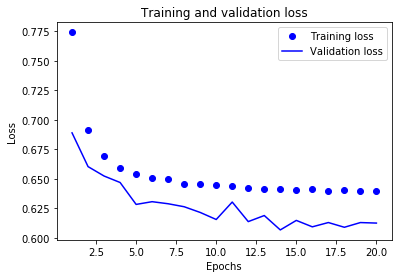

In [588]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

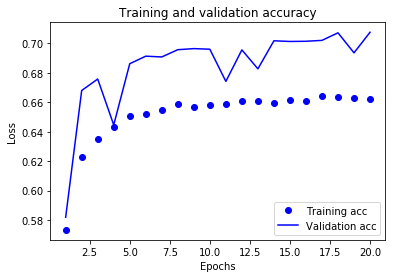

In [589]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [590]:
results = model.evaluate(x_val, y_val)
results

15000/15000 [==============================] - 1s 98us/step


[0.6125694931348165, 0.7076]

In [609]:
dense = [4, 8, 16, 24, 32, 40, 72, 112, 128, 256, 512]
drop = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
params_res = list()
for drop_item in drop:
    for dense_item in dense:
        model = models.Sequential()
        model.add(layers.Dense(dense_item, activation='relu', kernel_regularizer=regularizers.l2(0.0009)))
        model.add(layers.Dropout(drop_item))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, class_weight=class_weights)
        results = model.evaluate(x_val, y_val)
        params_res.append([drop_item, dense_item, results[0], results[1]])
params_res

Epoch 1/30
77700/77700 [==============================] - 6s 83us/step - loss: 0.6741 - acc: 0.5894
Epoch 2/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6539 - acc: 0.6234
Epoch 3/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6468 - acc: 0.6315
Epoch 4/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6438 - acc: 0.6327
Epoch 5/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6422 - acc: 0.6342
Epoch 6/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6406 - acc: 0.6355
Epoch 7/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6394 - acc: 0.6368
Epoch 8/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6388 - acc: 0.6372
Epoch 9/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6372 - acc: 0.6396
Epoch 10/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6365 - acc: 0.6397

77700/77700 [==============================] - 1s 18us/step - loss: 0.6183 - acc: 0.6612
Epoch 21/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6176 - acc: 0.6629
Epoch 22/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6163 - acc: 0.6626
Epoch 23/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6156 - acc: 0.6641
Epoch 24/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6151 - acc: 0.6653
Epoch 25/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6142 - acc: 0.6650
Epoch 26/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6139 - acc: 0.6674
Epoch 27/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6137 - acc: 0.6651
Epoch 28/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6126 - acc: 0.6658
Epoch 29/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6122 - acc: 0.6667
Ep

77700/77700 [==============================] - 2s 30us/step - loss: 0.6254 - acc: 0.6559
Epoch 10/30
77700/77700 [==============================] - 3s 32us/step - loss: 0.6246 - acc: 0.6573
Epoch 11/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6230 - acc: 0.6587: 2s - loss: 0.6230  - ETA: 1s - 
Epoch 12/30
77700/77700 [==============================] - 2s 30us/step - loss: 0.6214 - acc: 0.6599
Epoch 13/30
77700/77700 [==============================] - 2s 30us/step - loss: 0.6207 - acc: 0.6621: 0s - loss: 0.6202 -
Epoch 14/30
77700/77700 [==============================] - 2s 30us/step - loss: 0.6199 - acc: 0.6625:
Epoch 15/30
77700/77700 [==============================] - 2s 29us/step - loss: 0.6184 - acc: 0.6634: 0s - loss: 0.6181 - 
Epoch 16/30
77700/77700 [==============================] - 2s 30us/step - loss: 0.6173 - acc: 0.6638
Epoch 17/30
77700/77700 [==============================] - 2s 30us/step - loss: 0.6164 - acc: 0.6639: 0s - loss: 0.6162 - acc:


77700/77700 [==============================] - 3s 37us/step - loss: 0.6063 - acc: 0.6768
Epoch 24/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6054 - acc: 0.6772
Epoch 25/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6047 - acc: 0.6788
Epoch 26/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6030 - acc: 0.6817
Epoch 27/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6027 - acc: 0.6811
Epoch 28/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6023 - acc: 0.6811
Epoch 29/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6009 - acc: 0.6840
Epoch 30/30
15000/15000 [==============================] - 4s 295us/step
Epoch 1/30
77700/77700 [==============================] - 8s 107us/step - loss: 0.7071 - acc: 0.6150
Epoch 2/30
77700/77700 [==============================] - 3s 39us/step - loss: 0.6479 - acc: 0.6410
Epoch 3/30
77700/77700 [=======

77700/77700 [==============================] - 3s 42us/step - loss: 0.6258 - acc: 0.6615
Epoch 8/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6245 - acc: 0.6645
Epoch 9/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6224 - acc: 0.6653
Epoch 10/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6199 - acc: 0.6670
Epoch 11/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6182 - acc: 0.6705
Epoch 12/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6166 - acc: 0.6704
Epoch 13/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6149 - acc: 0.6732
Epoch 14/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6139 - acc: 0.6731
Epoch 15/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6126 - acc: 0.6743
Epoch 16/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6119 - acc: 0.6753
Epoc

77700/77700 [==============================] - 1s 15us/step - loss: 0.6200 - acc: 0.6580
Epoch 28/30
77700/77700 [==============================] - 1s 15us/step - loss: 0.6194 - acc: 0.6585
Epoch 29/30
77700/77700 [==============================] - 1s 15us/step - loss: 0.6187 - acc: 0.6589
Epoch 30/30
15000/15000 [==============================] - 3s 229us/step
Epoch 1/30
77700/77700 [==============================] - 7s 87us/step - loss: 0.6783 - acc: 0.5956
Epoch 2/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6478 - acc: 0.6348
Epoch 3/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6418 - acc: 0.6404
Epoch 4/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6388 - acc: 0.6423
Epoch 5/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6364 - acc: 0.6450
Epoch 6/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6349 - acc: 0.6475
Epoch 7/30
77700/77700 [============

77700/77700 [==============================] - 2s 21us/step - loss: 0.6205 - acc: 0.6613
Epoch 17/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6193 - acc: 0.6630
Epoch 18/30
77700/77700 [==============================] - 2s 22us/step - loss: 0.6191 - acc: 0.6635
Epoch 19/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6174 - acc: 0.6628
Epoch 20/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6171 - acc: 0.6642
Epoch 21/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6159 - acc: 0.6649
Epoch 22/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6146 - acc: 0.6673
Epoch 23/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6146 - acc: 0.6652
Epoch 24/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6135 - acc: 0.6671
Epoch 25/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6125 - acc: 0.6676
Ep

77700/77700 [==============================] - 3s 36us/step - loss: 0.6478 - acc: 0.6412
Epoch 3/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6401 - acc: 0.6458
Epoch 4/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6362 - acc: 0.6472
Epoch 5/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6331 - acc: 0.6529
Epoch 6/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6297 - acc: 0.6561
Epoch 7/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6273 - acc: 0.6586
Epoch 8/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6249 - acc: 0.6627
Epoch 9/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6234 - acc: 0.6611
Epoch 10/30
77700/77700 [==============================] - 3s 35us/step - loss: 0.6220 - acc: 0.6637
Epoch 11/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6202 - acc: 0.6651
Epoch 12/

77700/77700 [==============================] - 3s 38us/step - loss: 0.6072 - acc: 0.6803
Epoch 22/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6063 - acc: 0.6814
Epoch 23/30
77700/77700 [==============================] - 3s 39us/step - loss: 0.6053 - acc: 0.6826
Epoch 24/30
77700/77700 [==============================] - 3s 38us/step - loss: 0.6041 - acc: 0.6834 - ETA: 0s - loss: 0.6024
Epoch 25/30
77700/77700 [==============================] - 3s 38us/step - loss: 0.6039 - acc: 0.6839
Epoch 26/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6022 - acc: 0.6852
Epoch 27/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6009 - acc: 0.6853: 1s - loss: 0.5
Epoch 28/30
77700/77700 [==============================] - 3s 39us/step - loss: 0.6008 - acc: 0.6848
Epoch 29/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.5997 - acc: 0.6875
Epoch 30/30
15000/15000 [==============================] - 5s 

77700/77700 [==============================] - 1s 17us/step - loss: 0.6324 - acc: 0.6485
Epoch 11/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6318 - acc: 0.6479
Epoch 12/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6312 - acc: 0.6488
Epoch 13/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6306 - acc: 0.6508
Epoch 14/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6301 - acc: 0.6493
Epoch 15/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6296 - acc: 0.6493
Epoch 16/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6293 - acc: 0.6498
Epoch 17/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6287 - acc: 0.6500
Epoch 18/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6275 - acc: 0.6520
Epoch 19/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6268 - acc: 0.6532
Ep

77700/77700 [==============================] - 2s 22us/step - loss: 0.6129 - acc: 0.6667
Epoch 30/30
15000/15000 [==============================] - 4s 268us/step
Epoch 1/30
77700/77700 [==============================] - 8s 99us/step - loss: 0.6824 - acc: 0.6021
Epoch 2/30
77700/77700 [==============================] - 2s 24us/step - loss: 0.6480 - acc: 0.6365
Epoch 3/30
77700/77700 [==============================] - 2s 23us/step - loss: 0.6418 - acc: 0.6415: 0s - loss: 0.6417 - acc:
Epoch 4/30
77700/77700 [==============================] - 2s 24us/step - loss: 0.6382 - acc: 0.6450
Epoch 5/30
77700/77700 [==============================] - 2s 23us/step - loss: 0.6364 - acc: 0.6456
Epoch 6/30
77700/77700 [==============================] - 2s 24us/step - loss: 0.6335 - acc: 0.6499: 0s - loss: 0.6343 - a
Epoch 7/30
77700/77700 [==============================] - 2s 24us/step - loss: 0.6318 - acc: 0.6516
Epoch 8/30
77700/77700 [==============================] - 2s 24us/step - loss: 0.6297 - a

77700/77700 [==============================] - 3s 36us/step - loss: 0.6172 - acc: 0.6673
Epoch 17/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6161 - acc: 0.6672
Epoch 18/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6151 - acc: 0.6678
Epoch 19/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6143 - acc: 0.6697
Epoch 20/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6139 - acc: 0.6679
Epoch 21/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6120 - acc: 0.6725
Epoch 22/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6121 - acc: 0.6704
Epoch 23/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6112 - acc: 0.6717
Epoch 24/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6108 - acc: 0.6718
Epoch 25/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6096 - acc: 0.6722
Ep

77700/77700 [==============================] - 3s 41us/step - loss: 0.6052 - acc: 0.6783: 2s - loss: 0.6005 - acc: 0.6 -
Epoch 28/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6047 - acc: 0.6811: 2s - los - ETA: 1s - loss: 
Epoch 29/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6041 - acc: 0.6823: 0s - loss: 0.6038 - a
Epoch 30/30
15000/15000 [==============================] - 5s 331us/step
Epoch 1/30
77700/77700 [==============================] - 10s 124us/step - loss: 0.7270 - acc: 0.6211
Epoch 2/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6492 - acc: 0.6430
Epoch 3/30
77700/77700 [==============================] - 4s 45us/step - loss: 0.6410 - acc: 0.6451
Epoch 4/30
77700/77700 [==============================] - 4s 45us/step - loss: 0.6366 - acc: 0.6499
Epoch 5/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6327 - acc: 0.6536
Epoch 6/30
77700/77700 [==========================

77700/77700 [==============================] - 1s 16us/step - loss: 0.6398 - acc: 0.6397
Epoch 13/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6390 - acc: 0.6389
Epoch 14/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6383 - acc: 0.6410
Epoch 15/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6381 - acc: 0.6406
Epoch 16/30
77700/77700 [==============================] - 1s 15us/step - loss: 0.6376 - acc: 0.6402
Epoch 17/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6375 - acc: 0.6426
Epoch 18/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6365 - acc: 0.6412
Epoch 19/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6361 - acc: 0.6420
Epoch 20/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6354 - acc: 0.6430
Epoch 21/30
77700/77700 [==============================] - 1s 16us/step - loss: 0.6354 - acc: 0.6424
Ep

77700/77700 [==============================] - 8s 102us/step - loss: 0.6765 - acc: 0.6070
Epoch 2/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6488 - acc: 0.6336: 1s 
Epoch 3/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6426 - acc: 0.6413
Epoch 4/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6396 - acc: 0.6434
Epoch 5/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6364 - acc: 0.6455
Epoch 6/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6350 - acc: 0.6461
Epoch 7/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6333 - acc: 0.6466
Epoch 8/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6323 - acc: 0.6502
Epoch 9/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6310 - acc: 0.6519
Epoch 10/30
77700/77700 [==============================] - 2s 21us/step - loss: 0.6293 - acc: 0.6519
Epoc

77700/77700 [==============================] - 3s 36us/step - loss: 0.6180 - acc: 0.6650
Epoch 21/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6171 - acc: 0.6650
Epoch 22/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6165 - acc: 0.6663
Epoch 23/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6156 - acc: 0.6665
Epoch 24/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6147 - acc: 0.6661
Epoch 25/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6134 - acc: 0.6693
Epoch 26/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6140 - acc: 0.6678
Epoch 27/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6126 - acc: 0.6673
Epoch 28/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6127 - acc: 0.6685
Epoch 29/30
77700/77700 [==============================] - 3s 36us/step - loss: 0.6112 - acc: 0.6707
Ep

15000/15000 [==============================] - 5s 346us/step
Epoch 1/30
77700/77700 [==============================] - 10s 125us/step - loss: 0.7098 - acc: 0.6134
Epoch 2/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6509 - acc: 0.6398
Epoch 3/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6425 - acc: 0.6434: 
Epoch 4/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6378 - acc: 0.6467
Epoch 5/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6348 - acc: 0.6507
Epoch 6/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6321 - acc: 0.6529: 2s - - ETA: 0s - loss: 0.6316 - ac
Epoch 7/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6296 - acc: 0.6571
Epoch 8/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6282 - acc: 0.6579: 2s - loss: 0.62 - ETA: 1s - loss: 0.6
Epoch 9/30
77700/77700 [==============================] - 3s

77700/77700 [==============================] - 3s 43us/step - loss: 0.6270 - acc: 0.6620
Epoch 10/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6244 - acc: 0.6658
Epoch 11/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6237 - acc: 0.6650
Epoch 12/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6217 - acc: 0.6670
Epoch 13/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6205 - acc: 0.6682
Epoch 14/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6192 - acc: 0.6694
Epoch 15/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6173 - acc: 0.6723
Epoch 16/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6167 - acc: 0.6725
Epoch 17/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6158 - acc: 0.6744
Epoch 18/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6140 - acc: 0.6746
Ep

77700/77700 [==============================] - 1s 18us/step - loss: 0.6267 - acc: 0.6503
Epoch 29/30
77700/77700 [==============================] - 1s 18us/step - loss: 0.6266 - acc: 0.6516
Epoch 30/30
15000/15000 [==============================] - 4s 292us/step
Epoch 1/30
77700/77700 [==============================] - 8s 105us/step - loss: 0.6838 - acc: 0.5810
Epoch 2/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6547 - acc: 0.6282
Epoch 3/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6479 - acc: 0.6361
Epoch 4/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6443 - acc: 0.6393
Epoch 5/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6412 - acc: 0.6420
Epoch 6/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6399 - acc: 0.6430
Epoch 7/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6384 - acc: 0.6430
Epoch 8/30
77700/77700 [============

77700/77700 [==============================] - 2s 25us/step - loss: 0.6213 - acc: 0.6612
Epoch 17/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6215 - acc: 0.6603
Epoch 18/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6208 - acc: 0.6593
Epoch 19/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6202 - acc: 0.6607
Epoch 20/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6190 - acc: 0.6627
Epoch 21/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6187 - acc: 0.6626
Epoch 22/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6180 - acc: 0.6639
Epoch 23/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6175 - acc: 0.6650
Epoch 24/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6164 - acc: 0.6642
Epoch 25/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6155 - acc: 0.6662
Ep

77700/77700 [==============================] - 3s 41us/step - loss: 0.6510 - acc: 0.6399
Epoch 3/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6425 - acc: 0.6458
Epoch 4/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6373 - acc: 0.6490: 2s - loss: 0.6319 - acc:  - ETA: 2s - - ETA: 0s - loss: 0.6369 - acc:  - ETA: 0s - loss: 0.6373 - acc: 0.649 - ETA: 0s - loss: 0.6372 - acc: 0
Epoch 5/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6345 - acc: 0.6522
Epoch 6/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6317 - acc: 0.6549: 1s - loss: 0.6 - ETA: 0s - loss: 0.6315 - 
Epoch 7/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6298 - acc: 0.6554
Epoch 8/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6282 - acc: 0.6573: 2s - loss: 0.6257 - ac - ETA: 1s 
Epoch 9/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6265 - 

77700/77700 [==============================] - 4s 47us/step - loss: 0.6258 - acc: 0.6601
Epoch 11/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6236 - acc: 0.6638
Epoch 12/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6224 - acc: 0.6635
Epoch 13/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6222 - acc: 0.6663: 2s - loss: 0.6178 - acc:
Epoch 14/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6200 - acc: 0.6682: 0s - loss: 0.6199 - acc: 0.668 - ETA: 0s - loss: 0.6198 - acc
Epoch 15/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6189 - acc: 0.6685: 3s - loss: - ETA: 1s - 
Epoch 16/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6176 - acc: 0.6698
Epoch 17/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6168 - acc: 0.6711
Epoch 18/30
77700/77700 [==============================] - 3s 42us/step - loss: 0.6161 - a

77700/77700 [==============================] - 1s 19us/step - loss: 0.6363 - acc: 0.6386
Epoch 27/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6367 - acc: 0.6382
Epoch 28/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6368 - acc: 0.6402
Epoch 29/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6360 - acc: 0.6398
Epoch 30/30
15000/15000 [==============================] - 5s 318us/step
Epoch 1/30
77700/77700 [==============================] - 8s 107us/step - loss: 0.6835 - acc: 0.5710
Epoch 2/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6593 - acc: 0.6149
Epoch 3/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6511 - acc: 0.6283
Epoch 4/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6473 - acc: 0.6346
Epoch 5/30
77700/77700 [==============================] - 1s 17us/step - loss: 0.6460 - acc: 0.6356: 0s - loss: 0.6462 - acc: 0.6
Epoc

77700/77700 [==============================] - 2s 25us/step - loss: 0.6292 - acc: 0.6520: 0s - loss: 0.6289 -
Epoch 13/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6287 - acc: 0.6531
Epoch 14/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6285 - acc: 0.6531
Epoch 15/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6270 - acc: 0.6552
Epoch 16/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6267 - acc: 0.6552
Epoch 17/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6252 - acc: 0.6570: 0s - loss: 0.6254 - acc:
Epoch 18/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6243 - acc: 0.6574
Epoch 19/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6237 - acc: 0.6583
Epoch 20/30
77700/77700 [==============================] - 2s 25us/step - loss: 0.6233 - acc: 0.6584
Epoch 21/30
77700/77700 [==============================]

15000/15000 [==============================] - 6s 369us/step
Epoch 1/30
77700/77700 [==============================] - 11s 140us/step - loss: 0.6952 - acc: 0.6053
Epoch 2/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6516 - acc: 0.6354: 0s - loss: 0.6517 - acc: 0.635
Epoch 3/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6444 - acc: 0.6413
Epoch 4/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6403 - acc: 0.6455
Epoch 5/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6374 - acc: 0.6482
Epoch 6/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6349 - acc: 0.6495
Epoch 7/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6335 - acc: 0.6496
Epoch 8/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6308 - acc: 0.6536
Epoch 9/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6293 - acc: 0.6554 - ETA

77700/77700 [==============================] - 3s 45us/step - loss: 0.6259 - acc: 0.6607
Epoch 11/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6245 - acc: 0.6603
Epoch 12/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6233 - acc: 0.6634: 1s - lo
Epoch 13/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6221 - acc: 0.6643
Epoch 14/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6208 - acc: 0.6648
Epoch 15/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6196 - acc: 0.6660: 1s - loss: 0.6184 - acc:  - ETA: 1s - loss: 0.6177 - acc - ETA: 0s - loss: 0.6191 - ac
Epoch 16/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6191 - acc: 0.6662
Epoch 17/30
77700/77700 [==============================] - 4s 45us/step - loss: 0.6185 - acc: 0.6670
Epoch 18/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6174 - acc: 0.6669: 1s - 

77700/77700 [==============================] - 4s 48us/step - loss: 0.6133 - acc: 0.6739
Epoch 26/30
77700/77700 [==============================] - 4s 48us/step - loss: 0.6118 - acc: 0.6780
Epoch 27/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6118 - acc: 0.6800
Epoch 28/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6105 - acc: 0.6796
Epoch 29/30
77700/77700 [==============================] - 4s 49us/step - loss: 0.6096 - acc: 0.6811
Epoch 30/30
15000/15000 [==============================] - 7s 435us/step
Epoch 1/30
77700/77700 [==============================] - 9s 116us/step - loss: 0.6874 - acc: 0.5653
Epoch 2/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6732 - acc: 0.5877
Epoch 3/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6618 - acc: 0.6137
Epoch 4/30
77700/77700 [==============================] - 2s 20us/step - loss: 0.6563 - acc: 0.6238
Epoch 5/30
77700/77700 [=========

77700/77700 [==============================] - 2s 28us/step - loss: 0.6311 - acc: 0.6495
Epoch 14/30
77700/77700 [==============================] - 2s 28us/step - loss: 0.6303 - acc: 0.6504
Epoch 15/30
77700/77700 [==============================] - 2s 28us/step - loss: 0.6295 - acc: 0.6495
Epoch 16/30
77700/77700 [==============================] - 2s 28us/step - loss: 0.6293 - acc: 0.6511
Epoch 17/30
77700/77700 [==============================] - 2s 27us/step - loss: 0.6283 - acc: 0.6531
Epoch 18/30
77700/77700 [==============================] - 2s 27us/step - loss: 0.6280 - acc: 0.6527
Epoch 19/30
77700/77700 [==============================] - 2s 28us/step - loss: 0.6276 - acc: 0.6529
Epoch 20/30
77700/77700 [==============================] - 2s 27us/step - loss: 0.6272 - acc: 0.6517
Epoch 21/30
77700/77700 [==============================] - 2s 27us/step - loss: 0.6265 - acc: 0.6529
Epoch 22/30
77700/77700 [==============================] - 2s 27us/step - loss: 0.6260 - acc: 0.6534
Ep

15000/15000 [==============================] - 6s 372us/step
Epoch 1/30
77700/77700 [==============================] - 11s 144us/step - loss: 0.6890 - acc: 0.60021s - loss: 0.6920 - acc: 
Epoch 2/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6528 - acc: 0.6315: 1s - loss:
Epoch 3/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6458 - acc: 0.6390
Epoch 4/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6411 - acc: 0.6429
Epoch 5/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6386 - acc: 0.6459: - ETA: 1s - loss: 0.
Epoch 6/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6365 - acc: 0.6473
Epoch 7/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6347 - acc: 0.6484: 0s - loss: 0.6342 - acc: 
Epoch 8/30
77700/77700 [==============================] - 3s 43us/step - loss: 0.6328 - acc: 0.6496
Epoch 9/30
77700/77700 [===========================

77700/77700 [==============================] - 4s 53us/step - loss: 0.6243 - acc: 0.6617
Epoch 14/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6241 - acc: 0.6623
Epoch 15/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6222 - acc: 0.6624
Epoch 16/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6220 - acc: 0.6641
Epoch 17/30
77700/77700 [==============================] - 4s 52us/step - loss: 0.6208 - acc: 0.6645
Epoch 18/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6202 - acc: 0.6648
Epoch 19/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6190 - acc: 0.6666
Epoch 20/30
77700/77700 [==============================] - 4s 54us/step - loss: 0.6190 - acc: 0.6666
Epoch 21/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6178 - acc: 0.6670
Epoch 22/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6168 - acc: 0.6695
Ep

77700/77700 [==============================] - 4s 46us/step - loss: 0.6151 - acc: 0.6735
Epoch 25/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6145 - acc: 0.6706
Epoch 26/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6133 - acc: 0.6766
Epoch 27/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6134 - acc: 0.6750
Epoch 28/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6123 - acc: 0.6768
Epoch 29/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6116 - acc: 0.6765: 1s - loss: 
Epoch 30/30
15000/15000 [==============================] - 7s 479us/step
Epoch 1/30
77700/77700 [==============================] - 12s 151us/step - loss: 0.7473 - acc: 0.6230
Epoch 2/30
77700/77700 [==============================] - 4s 46us/step - loss: 0.6529 - acc: 0.6397
Epoch 3/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6457 - acc: 0.6438
Epoch 4/30
77700/7

77700/77700 [==============================] - 2s 19us/step - loss: 0.6382 - acc: 0.6410
Epoch 14/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6373 - acc: 0.6411: 1s - l
Epoch 15/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.6367 - acc: 0.6403
Epoch 16/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.6369 - acc: 0.6406
Epoch 17/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.6354 - acc: 0.6430
Epoch 18/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.6366 - acc: 0.6410
Epoch 19/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6363 - acc: 0.6414
Epoch 20/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.6349 - acc: 0.6428
Epoch 21/30
77700/77700 [==============================] - 1s 19us/step - loss: 0.6342 - acc: 0.6427: 1s - loss: 
Epoch 22/30
77700/77700 [==============================] - 2s 19us/step - loss: 0.

77700/77700 [==============================] - 11s 139us/step - loss: 0.6851 - acc: 0.5987
Epoch 2/30
77700/77700 [==============================] - 2s 32us/step - loss: 0.6519 - acc: 0.6317
Epoch 3/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6459 - acc: 0.6375
Epoch 4/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6412 - acc: 0.6436
Epoch 5/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6385 - acc: 0.6439
Epoch 6/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6374 - acc: 0.6456 ETA: 0s - loss: 0.6372 - acc: 0.64
Epoch 7/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6355 - acc: 0.6471: 1s - 
Epoch 8/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6340 - acc: 0.6490: 0s - loss: 0.6
Epoch 9/30
77700/77700 [==============================] - 2s 31us/step - loss: 0.6332 - acc: 0.6513: 0s - loss: 0.6336 - acc: 0. - ETA: 0s - loss: 0.63

77700/77700 [==============================] - 4s 53us/step - loss: 0.6240 - acc: 0.6602
Epoch 15/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6247 - acc: 0.6605
Epoch 16/30
77700/77700 [==============================] - 4s 57us/step - loss: 0.6231 - acc: 0.6604
Epoch 17/30
77700/77700 [==============================] - 4s 58us/step - loss: 0.6220 - acc: 0.6626
Epoch 18/30
77700/77700 [==============================] - 5s 59us/step - loss: 0.6225 - acc: 0.6621
Epoch 19/30
77700/77700 [==============================] - 4s 54us/step - loss: 0.6207 - acc: 0.6621
Epoch 20/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6208 - acc: 0.6639
Epoch 21/30
77700/77700 [==============================] - 4s 57us/step - loss: 0.6195 - acc: 0.6645
Epoch 22/30
77700/77700 [==============================] - 5s 59us/step - loss: 0.6183 - acc: 0.6645
Epoch 23/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6180 - acc: 0.6648
Ep

77700/77700 [==============================] - 12s 156us/step - loss: 0.7327 - acc: 0.6166
Epoch 2/30
77700/77700 [==============================] - 4s 49us/step - loss: 0.6542 - acc: 0.6391: 0s - loss: 0.6552 - a
Epoch 3/30
77700/77700 [==============================] - 4s 48us/step - loss: 0.6460 - acc: 0.6435
Epoch 4/30
77700/77700 [==============================] - 4s 50us/step - loss: 0.6408 - acc: 0.6464: 0s - loss: 0.6400 - a
Epoch 5/30
77700/77700 [==============================] - 4s 51us/step - loss: 0.6382 - acc: 0.6502
Epoch 6/30
77700/77700 [==============================] - 4s 52us/step - loss: 0.6357 - acc: 0.6511
Epoch 7/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6344 - acc: 0.6558
Epoch 8/30
77700/77700 [==============================] - 4s 54us/step - loss: 0.6324 - acc: 0.6570
Epoch 9/30
77700/77700 [==============================] - 4s 53us/step - loss: 0.6312 - acc: 0.6566
Epoch 10/30
77700/77700 [==============================] - 4s 5

77700/77700 [==============================] - 2s 26us/step - loss: 0.6469 - acc: 0.6057
Epoch 17/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6473 - acc: 0.6049
Epoch 18/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6466 - acc: 0.6051
Epoch 19/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6466 - acc: 0.6068: 0s - loss: 0.6467 - acc: 0.606
Epoch 20/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6470 - acc: 0.6074
Epoch 21/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6459 - acc: 0.6074
Epoch 22/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6468 - acc: 0.6056
Epoch 23/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6454 - acc: 0.6073
Epoch 24/30
77700/77700 [==============================] - 2s 26us/step - loss: 0.6463 - acc: 0.6064
Epoch 25/30
77700/77700 [==============================] - 2s 26us/step

77700/77700 [==============================] - 3s 35us/step - loss: 0.6480 - acc: 0.6363
Epoch 4/30
77700/77700 [==============================] - 3s 37us/step - loss: 0.6442 - acc: 0.6409
Epoch 5/30
77700/77700 [==============================] - 3s 38us/step - loss: 0.6418 - acc: 0.6441
Epoch 6/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6396 - acc: 0.6442
Epoch 7/30
77700/77700 [==============================] - 3s 45us/step - loss: 0.6372 - acc: 0.6471: 3s - loss: 0.6358
Epoch 8/30
77700/77700 [==============================] - 3s 40us/step - loss: 0.6374 - acc: 0.6458
Epoch 9/30
77700/77700 [==============================] - 3s 41us/step - loss: 0.6354 - acc: 0.6486: 0s - loss: 0.6350 - ac
Epoch 10/30
77700/77700 [==============================] - 3s 44us/step - loss: 0.6349 - acc: 0.6473
Epoch 11/30
77700/77700 [==============================] - 3s 38us/step - loss: 0.6338 - acc: 0.6488
Epoch 12/30
77700/77700 [==============================] - 3s 37us

77700/77700 [==============================] - 4s 48us/step - loss: 0.6253 - acc: 0.6566: 0s - loss: 0.6255 - acc:
Epoch 21/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6246 - acc: 0.6575: 0s - loss: 0.6248 - 
Epoch 22/30
77700/77700 [==============================] - 4s 48us/step - loss: 0.6250 - acc: 0.6580
Epoch 23/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6242 - acc: 0.6585
Epoch 24/30
77700/77700 [==============================] - 4s 48us/step - loss: 0.6230 - acc: 0.6592
Epoch 25/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6217 - acc: 0.6598: 0s - loss: 0.6221 - acc: 
Epoch 26/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6220 - acc: 0.6585
Epoch 27/30
77700/77700 [==============================] - 4s 48us/step - loss: 0.6218 - acc: 0.6592
Epoch 28/30
77700/77700 [==============================] - 4s 47us/step - loss: 0.6213 - acc: 0.6611: 0s - loss: 0.6204 - 
Epoch 

77700/77700 [==============================] - 5s 58us/step - loss: 0.6351 - acc: 0.6495: 1s 
Epoch 8/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6335 - acc: 0.6529:
Epoch 9/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6323 - acc: 0.6551
Epoch 10/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6309 - acc: 0.6549: 3s - loss: 0.6284 - acc: 0.657 - ETA: 3s - loss: 0.6287 
Epoch 11/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6297 - acc: 0.6579- ETA: 1s - loss
Epoch 12/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6286 - acc: 0.6581: 0s - loss: 0.6284 - acc
Epoch 13/30
77700/77700 [==============================] - 5s 58us/step - loss: 0.6280 - acc: 0.6584
Epoch 14/30
77700/77700 [==============================] - 5s 59us/step - loss: 0.6263 - acc: 0.6608: 4s - loss: 0.6158  - ETA - ETA: 1s - loss: 0.6257 - ac - ETA: 1s - loss: 0
Epoch 15/30
77700/77700 [

77700/77700 [==============================] - 4s 56us/step - loss: 0.6250 - acc: 0.6657
Epoch 20/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6245 - acc: 0.6681
Epoch 21/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6244 - acc: 0.6667
Epoch 22/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6228 - acc: 0.6704
Epoch 23/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6212 - acc: 0.6714
Epoch 24/30
77700/77700 [==============================] - 4s 56us/step - loss: 0.6216 - acc: 0.6705
Epoch 25/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6205 - acc: 0.6725
Epoch 26/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6203 - acc: 0.6717
Epoch 27/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6187 - acc: 0.6725
Epoch 28/30
77700/77700 [==============================] - 4s 55us/step - loss: 0.6187 - acc: 0.6731
Ep

[[0.1, 4, 0.6440828068415324, 0.6503999999682109],
 [0.1, 8, 0.6481842932065328, 0.6490666666348776],
 [0.1, 16, 0.6420748109499613, 0.654],
 [0.1, 24, 0.6488785074869792, 0.6425333333651225],
 [0.1, 32, 0.6509926137924195, 0.6561333333651225],
 [0.1, 40, 0.6495752031326294, 0.6528666666666667],
 [0.1, 72, 0.6641521934509277, 0.6477333333333334],
 [0.1, 112, 0.6521504128456116, 0.6522666666666667],
 [0.1, 128, 0.667708818658193, 0.6469333333333334],
 [0.1, 256, 0.6714190323829651, 0.6364000000317891],
 [0.1, 512, 0.6637340116818746, 0.6520666666666667],
 [0.15, 4, 0.6462863731066386, 0.6508666666666667],
 [0.15, 8, 0.6422148480415344, 0.6511999999682109],
 [0.15, 16, 0.6443849089940389, 0.6531333333015442],
 [0.15, 24, 0.6508987719535828, 0.6492666666666667],
 [0.15, 32, 0.6462785707155864, 0.6591333333333333],
 [0.15, 40, 0.6558157111803691, 0.6470000000317891],
 [0.15, 72, 0.6579338576634725, 0.6505333333015442],
 [0.15, 112, 0.6626776247342427, 0.6439333333015442],
 [0.15, 128, 0.65

In [608]:
results

[0.6676791593869528, 0.6436666666984558]

In [415]:
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(488,), kernel_regularizer=regularizers.l2(0.02)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l1(0.0001)))
#model.add(layers.Dropout(0.2))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, class_weight=class_weights)
results_1 = model_1.evaluate(x_val, y_val)

Epoch 1/20
77700/77700 [==============================] - 3s 37us/step - loss: 0.8768 - acc: 0.5868
Epoch 2/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6705 - acc: 0.6221
Epoch 3/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6637 - acc: 0.6258
Epoch 4/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6612 - acc: 0.6279
Epoch 5/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6593 - acc: 0.6303
Epoch 6/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6572 - acc: 0.6309
Epoch 7/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6567 - acc: 0.6321
Epoch 8/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6559 - acc: 0.6331
Epoch 9/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6555 - acc: 0.6322
Epoch 10/20
77700/77700 [==============================] - 1s 15us/step - loss: 0.6546 - acc: 0.6358

In [480]:
results_1

[0.6632511578559875, 0.6373333333015442]

In [612]:
max_features = 488

model = models.Sequential()
model.add(Embedding(max_features, 16))
#model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(16, dropout=0.5, recurrent_dropout=0.3,return_sequences=True))
model.add(SimpleRNN(16, dropout=0.5, recurrent_dropout=0.3, return_sequences=True))
model.add(SimpleRNN(16, dropout=0.5, recurrent_dropout=0.3, kernel_regularizer=regularizers.l2(0.1), activity_regularizer=regularizers.l1(0.01)))
#model_1.add(layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Train on 74160 samples, validate on 18540 samples
Epoch 1/20
74160/74160 [==============================] - 169s 2ms/step - loss: 11.1106 - acc: 0.5182 - val_loss: 2.7212 - val_acc: 0.6026
Epoch 2/20
74160/74160 [==============================] - 151s 2ms/step - loss: 3.7074 - acc: 0.5589 - val_loss: 0.6797 - val_acc: 0.6026
Epoch 3/20
74160/74160 [==============================] - 152s 2ms/step - loss: 0.7220 - acc: 0.5621 - val_loss: 0.6942 - val_acc: 0.6026
Epoch 4/20
74160/74160 [==============================] - 151s 2ms/step - loss: 0.7206 - acc: 0.5621 - val_loss: 0.6832 - val_acc: 0.6026
Epoch 5/20
74160/74160 [==============================] - 151s 2ms/step - loss: 0.7199 - acc: 0.5621 - val_loss: 0.6889 - val_acc: 0.6026
Epoch 6/20
74160/74160 [==============================] - 152s 2ms/step - loss: 0.7191 - acc: 0.5621 - val_loss: 0.6819 - val_acc: 0.6026
Epoch 7/20
74160/74160 [==============================] - 152s 2ms/step - loss: 0.7184 - acc: 0.5621 - val_loss: 0.6821 -

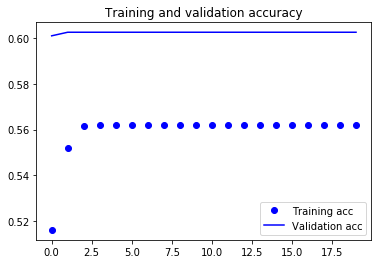

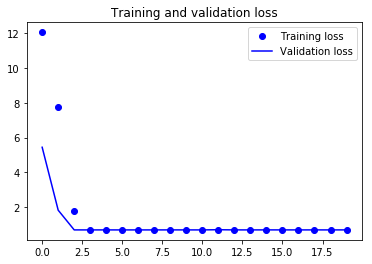

In [611]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [478]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 62160 samples, validate on 15540 samples
Epoch 1/10
62160/62160 [==============================] - 267s 4ms/step - loss: 0.6850 - acc: 0.5584 - val_loss: 0.6751 - val_acc: 0.6042
Epoch 2/10
62160/62160 [==============================] - 286s 5ms/step - loss: 0.6828 - acc: 0.5588 - val_loss: 0.6777 - val_acc: 0.6042
Epoch 3/10
62160/62160 [==============================] - 298s 5ms/step - loss: 0.6825 - acc: 0.5585 - val_loss: 0.6781 - val_acc: 0.6042
Epoch 4/10
62160/62160 [==============================] - 267s 4ms/step - loss: 0.6824 - acc: 0.5584 - val_loss: 0.6753 - val_acc: 0.6042
Epoch 5/10
62160/62160 [==============================] - 267s 4ms/step - loss: 0.6825 - acc: 0.5587 - val_loss: 0.6770 - val_acc: 0.6042
Epoch 6/10
62160/62160 [==============================] - 277s 4ms/step - loss: 0.6823 - acc: 0.5588 - val_loss: 0.6755 - val_acc: 0.6042
Epoch 7/10
62160/62160 [==============================] - 279s 4ms/step - loss: 0.6822 - acc: 0.5586 - val_loss: 0.6751 - 